In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath('..'))


Load Data

In [2]:
waste_data = pd.read_csv("../synthetic_waste_data.csv")
waste_data


,date,arrival_time,company,truck_id,waste_type,quantity_tons,quality_score,moisture_content,contamination_level,heating_value_MJ_per_kg
0,2022-01-01,2022-01-01 06:27:00,RegionalWaste Management,Reg3,Municipal,11.486050,7.929559,37.493209,2.070441,7.263229
1,2022-01-01,2022-01-01 06:32:00,RegionalWaste Management,Reg1,Industrial,19.855091,6.868888,18.746604,3.131112,11.807504
2,2022-01-01,2022-01-01 09:58:00,GreenWaste Solutions,Gre2,Organic,3.835948,6.364174,74.986417,3.635826,2.539645
3,2022-01-01,2022-01-01 10:06:00,IndustrialProcess Ltd,Ind1,Industrial,41.565434,8.821311,18.746604,1.178689,12.570800
4,2022-01-01,2022-01-01 10:14:00,GreenWaste Solutions,Gre1,Municipal,4.895075,6.149050,37.493209,3.850950,6.849568
...,...,...,...,...,...,...,...,...,...,...
17313,2024-12-31,2024-12-31 11:40:00,BuildRight Construction,Bui1,Construction,11.027408,5.704726,20.470406,4.295274,5.970507
17314,2024-12-31,2024-12-31 13:17:00,MunicipalWaste Co,Mun3,Municipal,16.620243,7.470465,34.117343,2.529535,7.385865
17315,2024-12-31,2024-12-31 13:34:00,IndustrialProcess Ltd,Ind3,Industrial,20.554325,8.548314,17.058671,1.451686,12.633587
17316,2024-12-31,2024-12-31 14:45:00,CommercialServices Inc,Com1,Commercial,16.317348,7.322251,22.744895,2.677749,9.278920


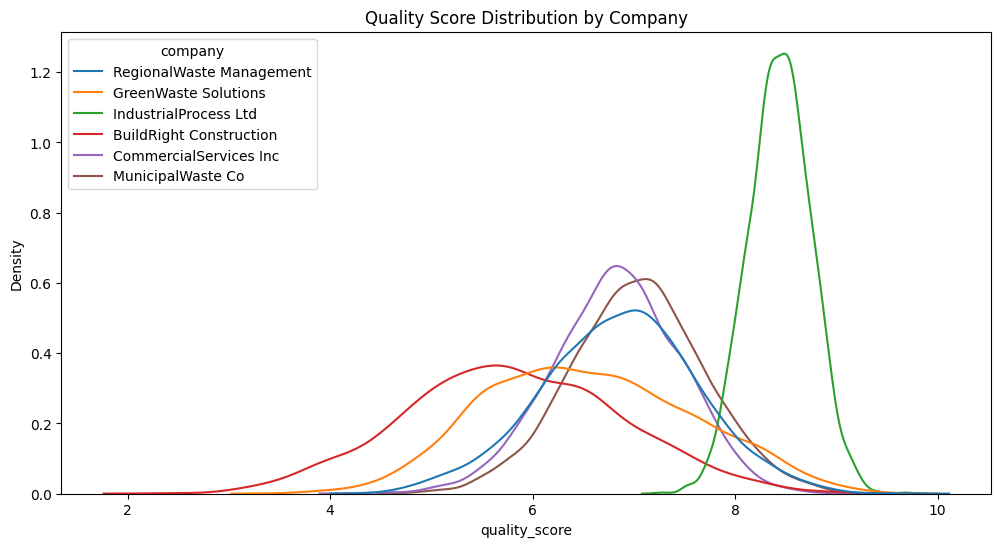

In [3]:
waste_data['date'] = pd.to_datetime(waste_data['date'])
plt.figure(figsize=(12, 6))
sns.kdeplot(data=waste_data, x='quality_score', hue=waste_data['company'], common_norm=False)
plt.title('Quality Score Distribution by Company')
plt.show()

In [4]:
regional_waste_data = waste_data[waste_data["company"] == "RegionalWaste Management"].copy()
regional_waste_data.head(10)

,date,arrival_time,company,truck_id,waste_type,quantity_tons,quality_score,moisture_content,contamination_level,heating_value_MJ_per_kg
0,2022-01-01,2022-01-01 06:27:00,RegionalWaste Management,Reg3,Municipal,11.486050,7.929559,37.493209,2.070441,7.263229
1,2022-01-01,2022-01-01 06:32:00,RegionalWaste Management,Reg1,Industrial,19.855091,6.868888,18.746604,3.131112,11.807504
7,2022-01-01,2022-01-01 14:57:00,RegionalWaste Management,Reg2,Commercial,20.487152,5.962900,24.995472,4.037100,8.701316
19,2022-01-03,2022-01-03 06:07:00,RegionalWaste Management,Reg2,Commercial,32.296330,8.074097,24.279603,1.925903,9.385024
22,2022-01-03,2022-01-03 07:46:00,RegionalWaste Management,Reg3,Municipal,18.225279,5.785798,36.419405,4.214202,6.834121
37,2022-01-03,2022-01-03 14:38:00,RegionalWaste Management,Reg4,Municipal,17.035943,5.978949,36.419405,4.021051,6.879452
42,2022-01-03,2022-01-03 15:40:00,RegionalWaste Management,Reg1,Organic,11.040346,6.087102,72.838809,3.912898,2.595562
43,2022-01-03,2022-01-03 15:46:00,RegionalWaste Management,Reg6,Municipal,19.454663,6.866765,36.419405,3.133235,7.087818
45,2022-01-03,2022-01-03 19:07:00,RegionalWaste Management,Reg8,Municipal,17.297951,7.750132,36.419405,2.249868,7.295140
46,2022-01-03,2022-01-03 19:38:00,RegionalWaste Management,Reg5,Industrial,28.335727,7.184253,18.209702,2.815747,11.982408


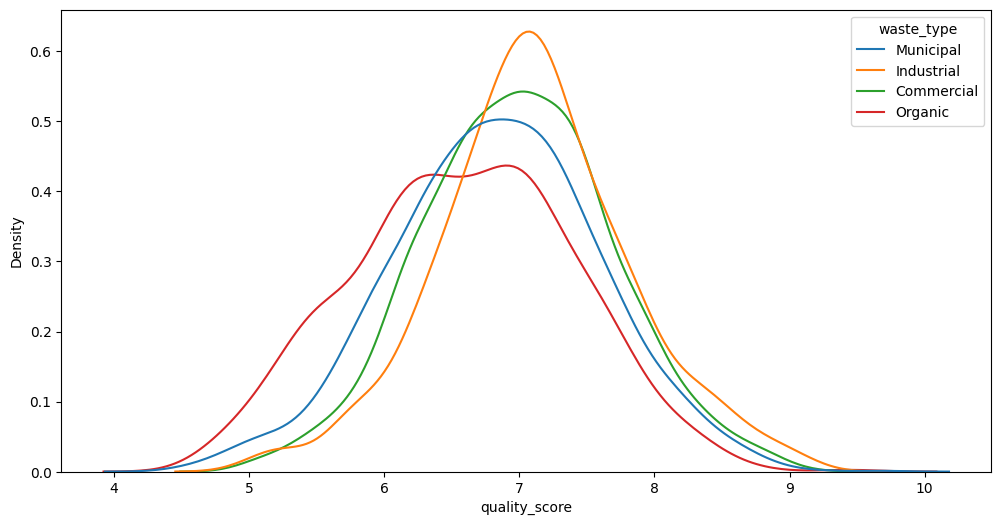

In [5]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=regional_waste_data, x='quality_score', hue=regional_waste_data['waste_type'], common_norm=False)

plt.show()

In [6]:

agg_waste_data = waste_data.groupby(waste_data['date'].dt.date)[["quantity_tons", "quality_score", "heating_value_MJ_per_kg"]].sum()

agg_waste_data

,quantity_tons,quality_score,heating_value_MJ_per_kg
date,,,
2022-01-01,153.851503,55.424702,67.783566
2022-01-02,245.846278,76.098876,93.054955
2022-01-03,574.139774,197.284022,208.689267
2022-01-04,446.454597,141.791959,173.335364
2022-01-05,141.906455,86.049265,80.909757
...,...,...,...
2024-12-27,865.147110,211.532347,225.286936
2024-12-28,252.648480,85.889949,97.085184
2024-12-29,72.427480,29.468819,34.418183


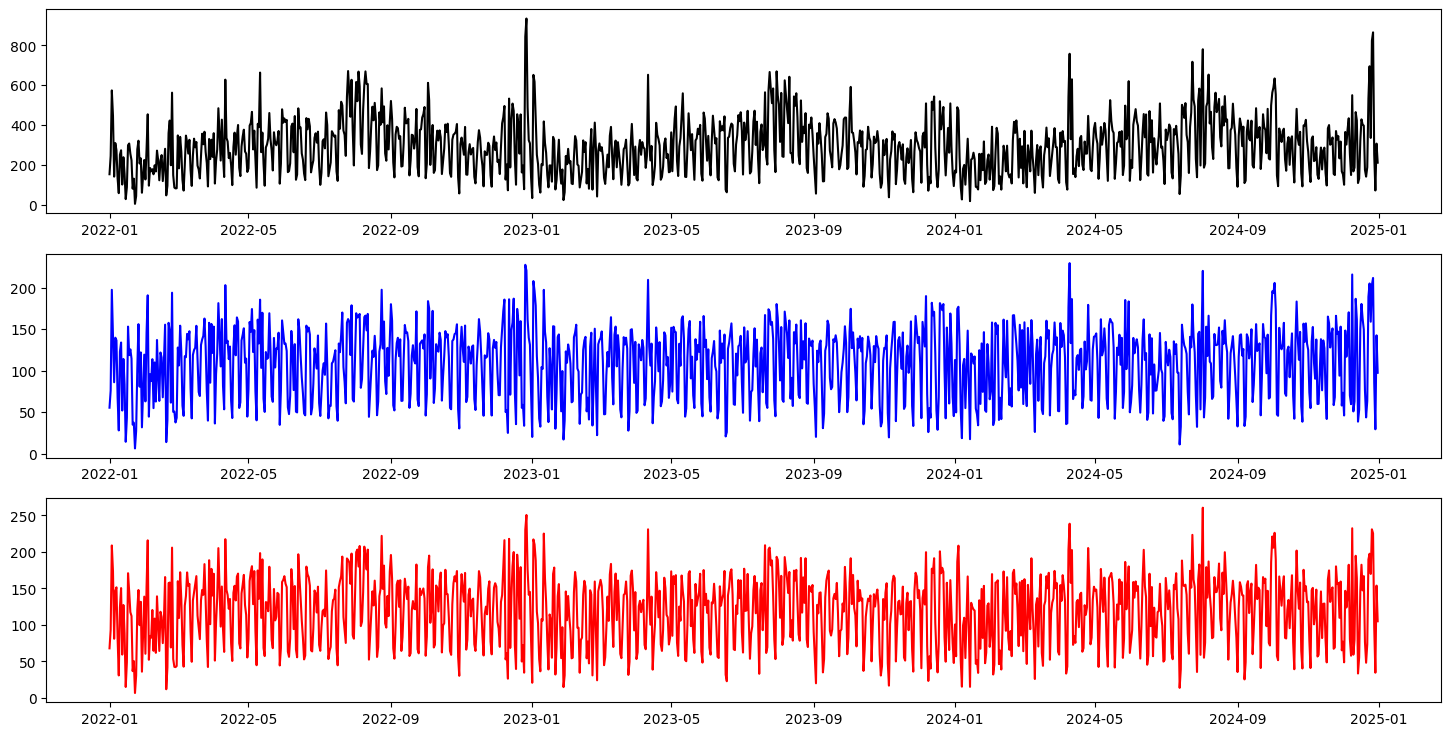

In [7]:
fig, (ax,bx,cx) = plt.subplots(nrows=3, ncols=1, figsize = (18,9))

ax.plot(agg_waste_data["quantity_tons"], color = "black")
bx.plot(agg_waste_data["quality_score"], color = "blue")
cx.plot(agg_waste_data["heating_value_MJ_per_kg"], color = "red")

plt.show()

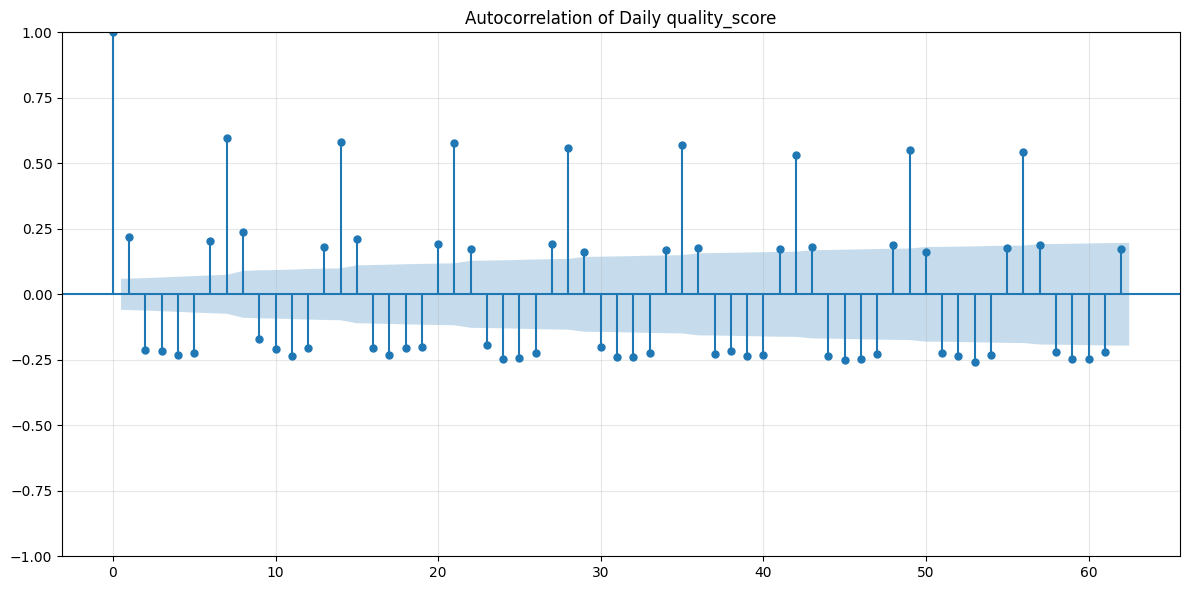

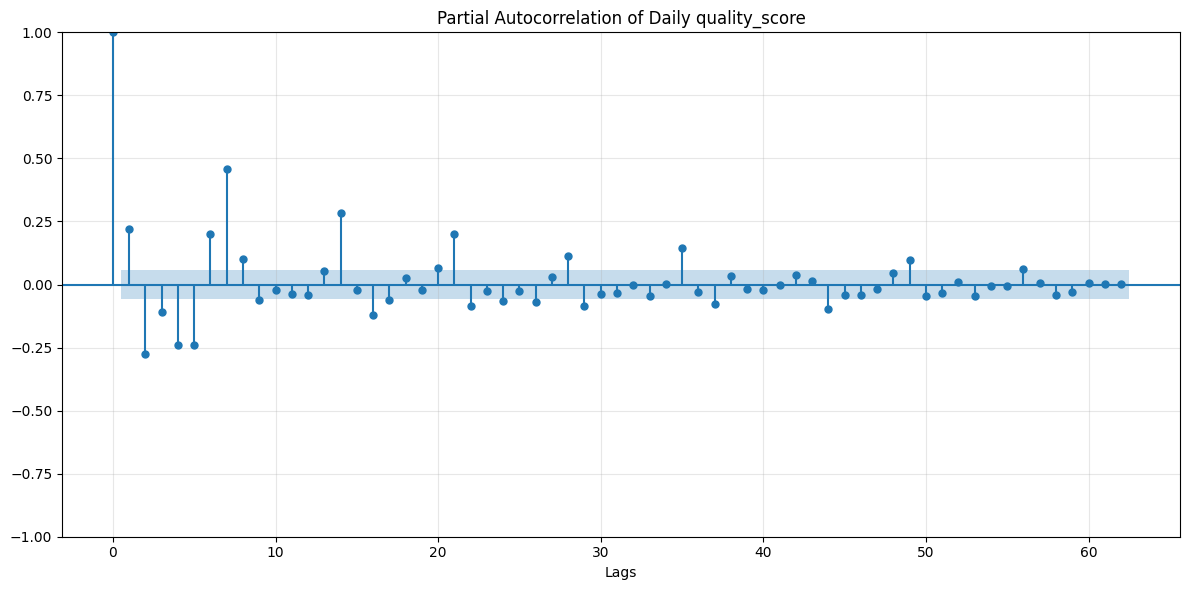

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
agg_waste_df = pd.DataFrame(agg_waste_data)

max_lag = 62

fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(agg_waste_df["quality_score"], ax=ax, lags=max_lag)  
plt.title('Autocorrelation of Daily quality_score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(agg_waste_df["quality_score"], ax=ax, lags=max_lag)
plt.title('Partial Autocorrelation of Daily quality_score')
plt.xlabel("Lags")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()